# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from random import sample 

import  local_python_packages.features_adding as localfunc


In [23]:
#For the purpose of Analysis we have taken flight for DL carrier in 2019.
df = pd.read_csv('UA flights 2019.csv', low_memory=False, parse_dates=[0])

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
df = localfunc.add_taxi_Ndays_rolling(df, 30)

In [26]:
df.head()

,fl_date,mkt_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,30d taxi_out,30d taxi_in
0,2019-01-01,UA,5611,N947SW,5611,14689,SBA,"Santa Barbara, CA",12892,LAX,"Los Angeles, CA",1915,1904.0,-11.0,12.0,1916.0,1942.0,12.0,2017,1954.0,-23.0,0.0,NaN,0.0,N,62.0,50.0,26.0,1.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,UA,4902,N11181,4902,11618,EWR,"Newark, NJ",13485,MSN,"Madison, WI",918,925.0,7.0,21.0,946.0,1112.0,3.0,1106,1115.0,9.0,0.0,NaN,0.0,N,168.0,170.0,146.0,1.0,799.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,UA,4901,N14179,4901,12264,IAD,"Washington, DC",10990,CHO,"Charlottesville, VA",1745,1744.0,-1.0,17.0,1801.0,1823.0,3.0,1841,1826.0,-15.0,0.0,NaN,0.0,N,56.0,42.0,22.0,1.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,UA,4900,N16183,4900,11618,EWR,"Newark, NJ",12264,IAD,"Washington, DC",1855,1852.0,-3.0,19.0,1911.0,2003.0,4.0,2024,2007.0,-17.0,0.0,NaN,0.0,N,89.0,75.0,52.0,1.0,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,UA,4880,N16147,4880,11618,EWR,"Newark, NJ",11066,CMH,"Columbus, OH",802,757.0,-5.0,24.0,821.0,955.0,9.0,1004,1004.0,0.0,0.0,NaN,0.0,N,122.0,127.0,94.0,1.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df = localfunc.add_traffic_rolling(df, 30)

In [ ]:
df.head()

In [28]:
df = localfunc.replace_nan_with_mean(df,'arr_delay')

In [ ]:
df.head()

In [ ]:
df=localfunc.make_month_dummies(df, 'fl_date')

In [ ]:
df = localfunc.make_dates_ordinal(df, 'fl_date')

In [ ]:
#df = localfunc.distill_features(df)

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
smpl=df.sample(1000)

<AxesSubplot:xlabel='arr_delay', ylabel='30d taxi_out'>

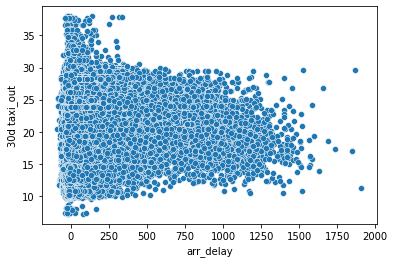

In [9]:
sns.scatterplot(data=df, x="arr_delay", y="30d taxi_out")

<AxesSubplot:xlabel='arr_delay', ylabel='30d taxi_in'>

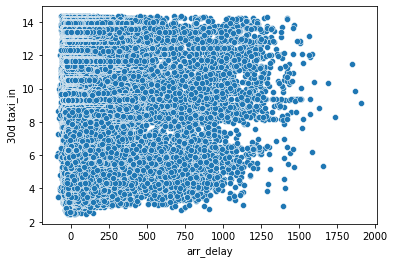

In [10]:
sns.scatterplot(data=df, x="arr_delay", y="30d taxi_in")

<AxesSubplot:xlabel='arr_delay', ylabel='taxi_out'>

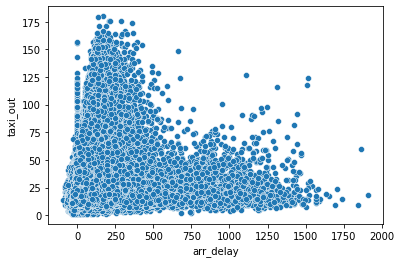

In [11]:
sns.scatterplot(data=df, x="arr_delay", y="taxi_out")

<AxesSubplot:xlabel='arr_delay', ylabel='taxi_in'>

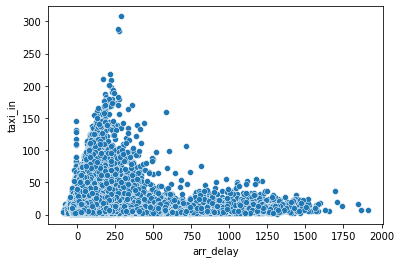

In [12]:
sns.scatterplot(data=df, x="arr_delay", y="taxi_in")

<AxesSubplot:xlabel='arr_delay', ylabel='30d roll flts origin_airport_id'>

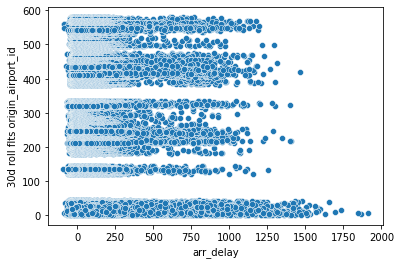

In [13]:
sns.scatterplot(data=df, x="arr_delay", y="30d roll flts origin_airport_id")

<AxesSubplot:xlabel='arr_delay', ylabel='30d roll flts dest_airport_id'>

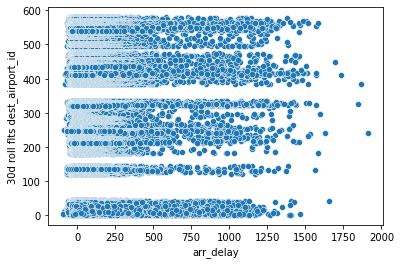

In [14]:
sns.scatterplot(data=df, x="arr_delay", y="30d roll flts dest_airport_id")

<AxesSubplot:xlabel='30d roll flts dest_airport_id', ylabel='30d taxi_in'>

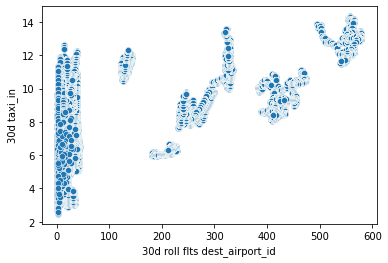

In [15]:
sns.scatterplot(data=df, x="30d roll flts dest_airport_id", y="30d taxi_in")

<AxesSubplot:xlabel='30d roll flts dest_airport_id', ylabel='taxi_in'>

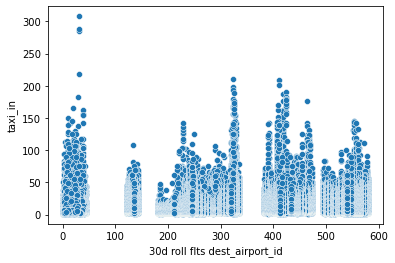

In [16]:
sns.scatterplot(data=df, x="30d roll flts dest_airport_id", y="taxi_in")

In [17]:
df['30d taxi_inXflights']=df['30d roll flts dest_airport_id']*df['30d taxi_in']

<AxesSubplot:xlabel='arr_delay', ylabel='30d taxi_inXflights'>

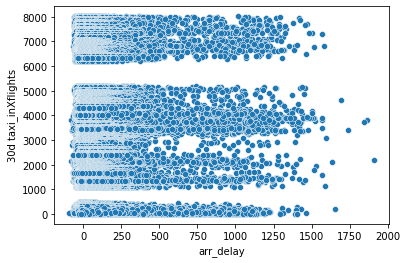

In [18]:
sns.scatterplot(data=df, x="arr_delay", y="30d taxi_inXflights")

In [ ]:
corr=df.corr()
sns.heatmap(corr)

In [29]:
origin_city_name_list=df['origin_city_name'].to_list()


In [30]:
dest_city_name_list=df['dest_city_name'].to_list()


In [31]:
final_list_cities =list(set().union(origin_city_name_list,dest_city_name_list))

In [32]:
len(final_list_cities)

238

In [36]:
origin_cities=df[['fl_date', 'origin_city_name']].groupby(['fl_date', 'origin_city_name']).count().reset_index()

In [40]:
origin_cities.rename(columns={'origin_city_name':'city_name'}, inplace=True)

In [37]:
dest_cities=df[['fl_date', 'dest_city_name']].groupby(['fl_date', 'dest_city_name']).count().reset_index()

In [41]:
dest_cities.rename(columns={'dest_city_name':'city_name'}, inplace=True)

In [42]:
cities_and_dates=dest_cities.merge(origin_cities, on=['fl_date', 'city_name'], how='outer')

In [44]:
cities_and_dates.head()

,fl_date,city_name
0,2019-01-01,"Aguadilla, PR"
1,2019-01-01,"Akron, OH"
2,2019-01-01,"Albany, NY"
3,2019-01-01,"Albuquerque, NM"
4,2019-01-01,"Alexandria, LA"


In [49]:
cities_and_dates

,fl_date,city_name,count
0,2019-01-01,"Aguadilla, PR",1
1,2019-01-01,"Akron, OH",1
2,2019-01-01,"Albany, NY",1
3,2019-01-01,"Albuquerque, NM",1
4,2019-01-01,"Alexandria, LA",1
...,...,...,...
84111,2019-12-25,"Liberal, KS",1
84112,2019-12-25,"Salina, KS",1
84113,2019-12-25,"Twin Falls, ID",1
84114,2019-12-29,"Twin Falls, ID",1


In [51]:
cities_and_dates.to_csv('cities_and_dates.csv', sep=",")

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

In [ ]:
df.head()

In [ ]:
df.head()

In [ ]:
df['month']=df['fl_date'].dt.month

In [ ]:
df[['month', 'arr_delay']].groupby(['month']).mean().reset_index()

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.